<a href="https://colab.research.google.com/github/Legajo/Colab-Notebooks/blob/main/HW1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# S&P 500 Market Corrections Analysis
# Google Colab Notebook

# ============================================================================
# SETUP: Install and Import Required Libraries
# ============================================================================

# Install yfinance if not already installed
!pip install yfinance -q

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print("✓ Libraries imported successfully\n")


✓ Libraries imported successfully



In [3]:
# ============================================================================
# STEP 1: Download S&P 500 Historical Data (1950-present)
# ============================================================================

print("=" * 70)
print("STEP 1: Downloading S&P 500 Historical Data")
print("=" * 70)

# Download data using yfinance
sp500 = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d'), progress=False, auto_adjust=False)

# Use adjusted close prices - handle different data structures
try:
    if isinstance(sp500.columns, pd.MultiIndex):
        prices = sp500['Adj Close']['^GSPC'].dropna()
    else:
        prices = sp500['Adj Close'].dropna()
except KeyError:
    # Fallback to Close if Adj Close is not available
    if isinstance(sp500.columns, pd.MultiIndex):
        prices = sp500['Close']['^GSPC'].dropna()
    else:
        prices = sp500['Close'].dropna()
    print("Note: Using Close prices (Adj Close not available)")

print(f"Data range: {prices.index[0].date()} to {prices.index[-1].date()}")
print(f"Total data points: {len(prices):,}")
print(f"✓ Data downloaded successfully\n")

STEP 1: Downloading S&P 500 Historical Data
Data range: 1950-01-03 to 2025-10-02
Total data points: 19,059
✓ Data downloaded successfully



In [4]:
# ============================================================================
# STEP 2: Identify All-Time High Points
# ============================================================================

print("=" * 70)
print("STEP 2: Identifying All-Time High Points")
print("=" * 70)

all_time_highs = []
current_max = -np.inf

for date, price in prices.items():
    if price > current_max:
        all_time_highs.append({'date': date, 'price': price})
        current_max = price

ath_df = pd.DataFrame(all_time_highs)
print(f"Number of all-time highs identified: {len(ath_df):,}")
print(f"First ATH: {ath_df.iloc[0]['date'].date()} at ${ath_df.iloc[0]['price']:.2f}")
print(f"Latest ATH: {ath_df.iloc[-1]['date'].date()} at ${ath_df.iloc[-1]['price']:.2f}")
print(f"✓ All-time highs identified\n")


STEP 2: Identifying All-Time High Points
Number of all-time highs identified: 1,474
First ATH: 1950-01-03 at $16.66
Latest ATH: 2025-10-02 at $6715.35
✓ All-time highs identified



In [5]:

# ============================================================================
# STEP 3: Find Minimum Price Between Consecutive All-Time Highs
# ============================================================================

print("=" * 70)
print("STEP 3: Finding Minimum Prices Between Consecutive ATHs")
print("=" * 70)

corrections_data = []

for i in range(len(ath_df) - 1):
    start_date = ath_df.iloc[i]['date']
    end_date = ath_df.iloc[i + 1]['date']
    high_price = ath_df.iloc[i]['price']

    # Get prices between consecutive ATHs
    period_prices = prices[(prices.index > start_date) & (prices.index < end_date)]

    if len(period_prices) > 0:
        min_price = period_prices.min()
        min_date = period_prices.idxmin()

        corrections_data.append({
            'ath_date': start_date,
            'ath_price': high_price,
            'trough_date': min_date,
            'trough_price': min_price,
            'recovery_date': end_date,
            'recovery_price': ath_df.iloc[i + 1]['price']
        })

print(f"Analyzed {len(corrections_data)} periods between consecutive ATHs")
print(f"✓ Minimum prices identified\n")


STEP 3: Finding Minimum Prices Between Consecutive ATHs
Analyzed 669 periods between consecutive ATHs
✓ Minimum prices identified



In [6]:

# ============================================================================
# STEP 4: Calculate Drawdown Percentages
# ============================================================================

print("=" * 70)
print("STEP 4: Calculating Drawdown Percentages")
print("=" * 70)

for correction in corrections_data:
    drawdown_pct = ((correction['ath_price'] - correction['trough_price']) /
                    correction['ath_price']) * 100
    correction['drawdown_pct'] = drawdown_pct

corrections_df = pd.DataFrame(corrections_data)

print(f"Average drawdown: {corrections_df['drawdown_pct'].mean():.2f}%")
print(f"Maximum drawdown: {corrections_df['drawdown_pct'].max():.2f}%")
print(f"Minimum drawdown: {corrections_df['drawdown_pct'].min():.2f}%")
print(f"✓ Drawdowns calculated\n")


STEP 4: Calculating Drawdown Percentages
Average drawdown: 2.30%
Maximum drawdown: 56.78%
Minimum drawdown: 0.00%
✓ Drawdowns calculated



In [7]:
# ============================================================================
# STEP 5: Filter for Corrections >= 5% Drawdown
# ============================================================================

print("=" * 70)
print("STEP 5: Filtering for Corrections >= 5%")
print("=" * 70)

significant_corrections = corrections_df[corrections_df['drawdown_pct'] >= 5.0].copy()

print(f"Total periods analyzed: {len(corrections_df)}")
print(f"Corrections >= 5%: {len(significant_corrections)}")
print(f"Corrections < 5%: {len(corrections_df) - len(significant_corrections)}")
print(f"✓ Filtered for significant corrections\n")


STEP 5: Filtering for Corrections >= 5%
Total periods analyzed: 669
Corrections >= 5%: 72
Corrections < 5%: 597
✓ Filtered for significant corrections



In [8]:

# ============================================================================
# STEP 6: Calculate Duration in Days for Each Correction
# ============================================================================

print("=" * 70)
print("STEP 6: Calculating Correction Durations")
print("=" * 70)

significant_corrections['duration_days'] = (
    significant_corrections['recovery_date'] - significant_corrections['ath_date']
).dt.days

print(f"Duration statistics:")
print(f"  Mean: {significant_corrections['duration_days'].mean():.1f} days")
print(f"  Min: {significant_corrections['duration_days'].min()} days")
print(f"  Max: {significant_corrections['duration_days'].max()} days")
print(f"✓ Durations calculated\n")


STEP 6: Calculating Correction Durations
Duration statistics:
  Mean: 279.6 days
  Min: 10 days
  Max: 2744 days
✓ Durations calculated



In [9]:
# ============================================================================
# STEP 7: Calculate 25th, 50th (Median), and 75th Percentiles
# ============================================================================

print("=" * 70)
print("STEP 7: FINAL RESULTS - Duration Percentiles")
print("=" * 70)

durations = significant_corrections['duration_days']

p25 = np.percentile(durations, 25)
p50 = np.percentile(durations, 50)  # Median
p75 = np.percentile(durations, 75)

print("\n" + "=" * 70)
print("CORRECTION DURATION STATISTICS (Days)")
print("=" * 70)
print(f"25th Percentile: {p25:.1f} days ({p25/30:.1f} months)")
print(f"50th Percentile (MEDIAN): {p50:.1f} days ({p50/30:.1f} months)")
print(f"75th Percentile: {p75:.1f} days ({p75/30:.1f} months)")
print(f"\nMean Duration: {durations.mean():.1f} days ({durations.mean()/30:.1f} months)")
print(f"Standard Deviation: {durations.std():.1f} days")
print(f"Min Duration: {durations.min()} days")
print(f"Max Duration: {durations.max()} days")
print("=" * 70)

STEP 7: FINAL RESULTS - Duration Percentiles

CORRECTION DURATION STATISTICS (Days)
25th Percentile: 56.5 days (1.9 months)
50th Percentile (MEDIAN): 98.0 days (3.3 months)
75th Percentile: 212.8 days (7.1 months)

Mean Duration: 279.6 days (9.3 months)
Standard Deviation: 512.4 days
Min Duration: 10 days
Max Duration: 2744 days



DRAWDOWN STATISTICS (%)
Average Drawdown: 12.67%
Median Drawdown: 7.99%
Max Drawdown: 56.78%
Min Drawdown: 5.00%

TOP 10 LONGEST CORRECTIONS

1973-01-11 → 1980-07-17
  Duration: 2744 days (7.5 years)
  Drawdown: 48.20%
  ATH: $120.24 → Trough: $62.28

2000-03-24 → 2007-05-30
  Duration: 2623 days (7.2 years)
  Drawdown: 49.15%
  ATH: $1527.46 → Trough: $776.76

2007-10-09 → 2013-03-28
  Duration: 1997 days (5.5 years)
  Drawdown: 56.78%
  ATH: $1565.15 → Trough: $676.53

1968-11-29 → 1972-03-06
  Duration: 1193 days (3.3 years)
  Drawdown: 36.06%
  ATH: $108.37 → Trough: $69.29

1956-08-02 → 1958-09-24
  Duration: 783 days (2.1 years)
  Drawdown: 21.47%
  ATH: $49.64 → Trough: $38.98

2022-01-03 → 2024-01-19
  Duration: 746 days (2.0 years)
  Drawdown: 25.43%
  ATH: $4796.56 → Trough: $3577.03

1980-11-28 → 1982-11-03
  Duration: 705 days (1.9 years)
  Drawdown: 27.11%
  ATH: $140.52 → Trough: $102.42

1987-08-25 → 1989-07-26
  Duration: 701 days (1.9 years)
  Drawdown: 33.51%
  ATH: 

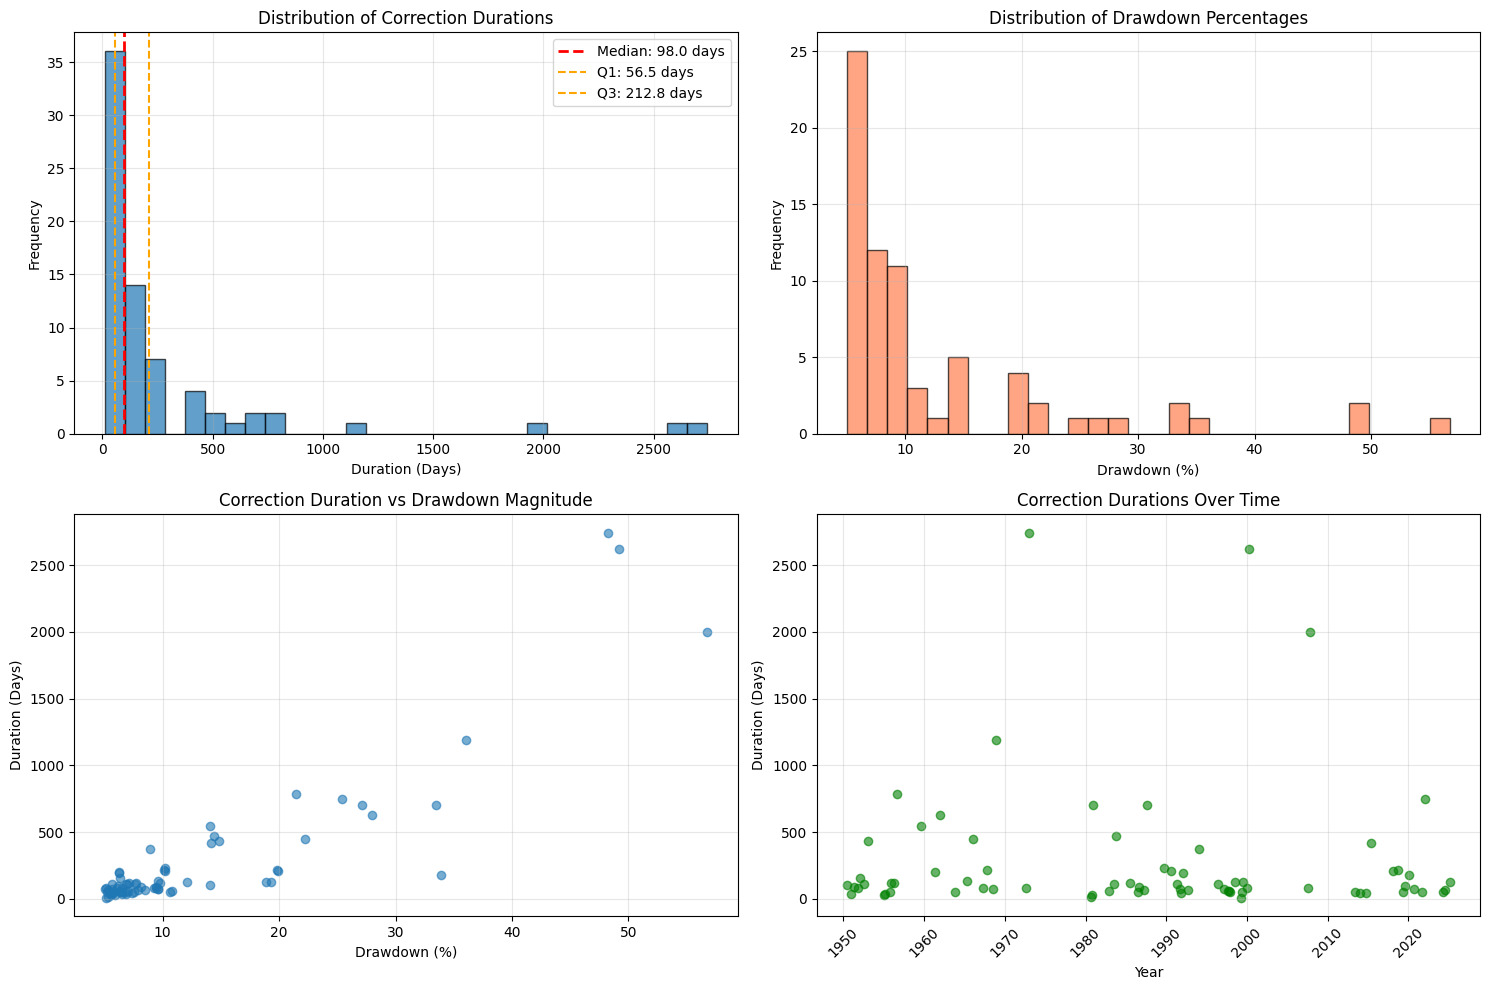


✓ Analysis complete!

✓ Results saved to 'sp500_corrections_analysis.csv'


In [10]:

# ============================================================================
# BONUS: Additional Analysis and Visualizations
# ============================================================================

print("\n" + "=" * 70)
print("DRAWDOWN STATISTICS (%)")
print("=" * 70)
print(f"Average Drawdown: {significant_corrections['drawdown_pct'].mean():.2f}%")
print(f"Median Drawdown: {significant_corrections['drawdown_pct'].median():.2f}%")
print(f"Max Drawdown: {significant_corrections['drawdown_pct'].max():.2f}%")
print(f"Min Drawdown: {significant_corrections['drawdown_pct'].min():.2f}%")
print("=" * 70)

print("\n" + "=" * 70)
print("TOP 10 LONGEST CORRECTIONS")
print("=" * 70)
top_corrections = significant_corrections.nlargest(10, 'duration_days')
for idx, row in top_corrections.iterrows():
    print(f"\n{row['ath_date'].date()} → {row['recovery_date'].date()}")
    print(f"  Duration: {row['duration_days']} days ({row['duration_days']/365:.1f} years)")
    print(f"  Drawdown: {row['drawdown_pct']:.2f}%")
    print(f"  ATH: ${row['ath_price']:.2f} → Trough: ${row['trough_price']:.2f}")

print("\n" + "=" * 70)
print("TOP 10 DEEPEST CORRECTIONS")
print("=" * 70)
deep_corrections = significant_corrections.nlargest(10, 'drawdown_pct')
for idx, row in deep_corrections.iterrows():
    print(f"\n{row['ath_date'].date()} → {row['recovery_date'].date()}")
    print(f"  Drawdown: {row['drawdown_pct']:.2f}%")
    print(f"  Duration: {row['duration_days']} days ({row['duration_days']/365:.1f} years)")
    print(f"  ATH: ${row['ath_price']:.2f} → Trough: ${row['trough_price']:.2f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Duration Distribution
axes[0, 0].hist(significant_corrections['duration_days'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(p50, color='red', linestyle='--', linewidth=2, label=f'Median: {p50:.1f} days')
axes[0, 0].axvline(p25, color='orange', linestyle='--', linewidth=1.5, label=f'Q1: {p25:.1f} days')
axes[0, 0].axvline(p75, color='orange', linestyle='--', linewidth=1.5, label=f'Q3: {p75:.1f} days')
axes[0, 0].set_xlabel('Duration (Days)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Correction Durations')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Drawdown Distribution
axes[0, 1].hist(significant_corrections['drawdown_pct'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Drawdown (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Drawdown Percentages')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Duration vs Drawdown
axes[1, 0].scatter(significant_corrections['drawdown_pct'], significant_corrections['duration_days'], alpha=0.6)
axes[1, 0].set_xlabel('Drawdown (%)')
axes[1, 0].set_ylabel('Duration (Days)')
axes[1, 0].set_title('Correction Duration vs Drawdown Magnitude')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Corrections Over Time
axes[1, 1].scatter(significant_corrections['ath_date'], significant_corrections['duration_days'], alpha=0.6, color='green')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Duration (Days)')
axes[1, 1].set_title('Correction Durations Over Time')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete!")

# Save results to CSV (optional in Colab)
significant_corrections.to_csv('sp500_corrections_analysis.csv', index=False)
print("\n✓ Results saved to 'sp500_corrections_analysis.csv'")